# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [109]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier


In [110]:
df = pd.read_csv("C:/Users/Panel/PycharmProjects/petprojectnew/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [111]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [112]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [113]:
sum(df['Churn'] == 'Yes')/len(df)

0.2653698707936959

уходят примерно 26,5% клиентов

In [115]:
index = df['customerID']
df = df.drop('customerID', axis = 1)

In [116]:
cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']

In [117]:
for col in cat:
    print('\n')
    print(df.groupby(col)['Churn'].value_counts(normalize=True).unstack()['Yes'])



gender
Female    0.269209
Male      0.261603
Name: Yes, dtype: float64


Partner
No     0.329580
Yes    0.196649
Name: Yes, dtype: float64


Dependents
No     0.312791
Yes    0.154502
Name: Yes, dtype: float64


PhoneService
No     0.249267
Yes    0.267096
Name: Yes, dtype: float64


MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Yes, dtype: float64


InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Yes, dtype: float64


OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Yes, dtype: float64


OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Yes, dtype: float64


DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Yes, dtype: float64


TechSupport
No                     0.416355
No inte

In [118]:
# больше всего на уход клиента влияют InternetService, OnlineSecurity, OnlineBackup, DeviceProtection,
# TechSupport, Contract

In [119]:
n_col = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [120]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].dtype

dtype('float64')

In [121]:
df['Churn01'] = (df['Churn'] == 'Yes').astype(int)

<Axes: >

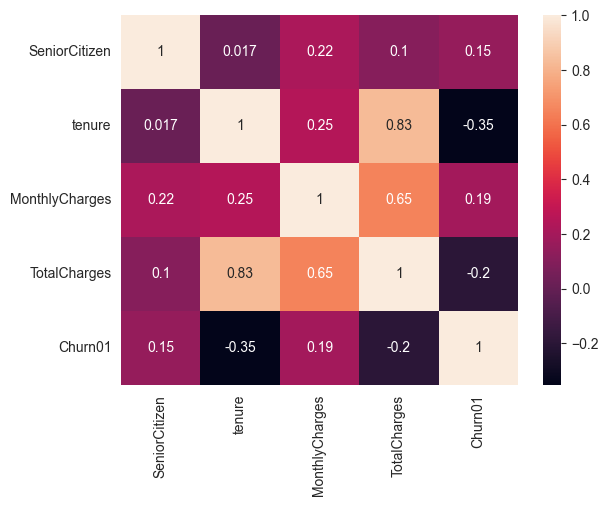

In [122]:
sns.heatmap(
    df[n_col + ['Churn01']].corr(),
    annot=True
)

In [123]:
c_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract']
n_cols = ['tenure', 'MonthlyCharges']

In [124]:
x = pd.get_dummies(
    df[c_cols + n_cols],
    drop_first = True
)
y = df['Churn01']

In [125]:
x_train, x_test, y_train, y_test, id_train, id_test = train_test_split(
    x, y, index, test_size = 0.2, random_state = 42, stratify = y
)
model = LogisticRegression(max_iter=1000)#, class_weight='balanced')
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [126]:
roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

0.834449352863675

In [127]:
proba = model.predict_proba(x_test)[:,1]
y_pred = (proba >= 0.3).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.51      0.76      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.76      1409



In [128]:
proba_train = model.predict_proba(x_train)[:,1]
pred_train = (proba_train > 0.3).astype(int)
proba_test = model.predict_proba(x_test)[:,1]
pred_test = (proba_test > 0.3).astype(int)

In [129]:
print("Train:",
      precision_score(y_train, pred_train),
      recall_score(y_train, pred_train))

print("Test:",
      precision_score(y_test, pred_test),
      recall_score(y_test, pred_test))

Train: 0.529275092936803 0.7618729096989967
Test: 0.510752688172043 0.7620320855614974


precision 0.57(из предсказанных уходов ~57% реальные)
recall 0.51(модель находит ~51% уходящих)

добавил class_weight='balanced', теперь pr 0,48, а recall 0.79

убрал балансировку, вместо этого понизил порог вер-ти до 0.3, теперь pr 0,51, а recall 0.76


In [130]:
res = pd.DataFrame({
    'ID': id_test,
    "churn_probability": proba,
    "predicted_churn": y_pred
})
res

,ID,churn_probability,predicted_churn
437,4376-KFVRS,0.034753,0
2280,2754-SDJRD,0.649296,1
2235,9917-KWRBE,0.087209,0
4460,0365-GXEZS,0.480871,1
3761,9385-NXKDA,0.020576,0
...,...,...,...
5143,5204-HMGYF,0.051359,0
4439,9950-MTGYX,0.023089,0
3857,3675-EQOZA,0.170066,0
4758,3646-ITDGM,0.010246,0


In [131]:
sum(res['predicted_churn'] == 1)/len(res)

0.3960255500354862

~39.6% клиентов были помечены моделью как "ушел"

ТЕПЕРЬ ПОПРОБУЮ CATBOOST

In [133]:
X = df[n_cols + c_cols]
Y = df['Churn01']

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y)

In [135]:
model = CatBoostClassifier(
    iterations=400,
    depth=4,
    learning_rate=0.1,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=100,
    class_weights=[1, 3]
)

model.fit(
    X_train, Y_train,
    cat_features=c_cols,
    eval_set=(X_test, Y_test)
)

0:	test: 0.8073523	best: 0.8073523 (0)	total: 165ms	remaining: 1m 5s
100:	test: 0.8412604	best: 0.8415394 (84)	total: 3.04s	remaining: 9s
200:	test: 0.8415136	best: 0.8425147 (127)	total: 6.14s	remaining: 6.08s
300:	test: 0.8396187	best: 0.8425147 (127)	total: 8.88s	remaining: 2.92s
399:	test: 0.8354982	best: 0.8425147 (127)	total: 11.5s	remaining: 0us

bestTest = 0.8425146607
bestIteration = 127

Shrink model to first 128 iterations.


In [136]:
from sklearn.metrics import classification_report, roc_auc_score

proba = model.predict_proba(X_test)[:,1]
pred = (proba > 0.55).astype(int)

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.77      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



In [137]:

print("ROC AUC:", roc_auc_score(y_test, proba))

ROC AUC: 0.8425146606732284


In [139]:
print("Train:",
      precision_score(Y_train, pred_train),
      recall_score(Y_train, pred_train))

print("Test:",
      precision_score(Y_test, pred_test),
      recall_score(Y_test, pred_test))

Train: 0.529275092936803 0.7618729096989967
Test: 0.510752688172043 0.7620320855614974


CATBOOST НЕ НУЖЕН, ОН НЕ ДАЕТ ПРИРОСТА ПО RECALL И PRECISION